### AVD862 Digital Image Processing
#### Programming Assignment 2
##### Submitted By: Saurabh Kumar (SC22B146)

**1. Discrete Fourier Transform**  
Display the Fourier transform of given images. Analyze how the image is getting transformed into frequency domain and also display the Fourier kernels.  
(Use cameraman.png, horizontal.png and vertical.png images)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
# Function to calculate DFT
def get_dft_matrix(img):
    # convert to grayscale using luminosity method
    if img.ndim == 3:
        img = 0.2989 * img[..., 0] + 0.5870 * img[..., 1] + 0.1140 * img[..., 2]

    N, _ = img.shape # assuming we get a sqauare image
    u = np.arange(N).reshape(N, 1)
    v = np.arange(N).reshape(1, N)
    
    # W_uv = exp(-j*2*pi*u*v / N)
    omega = np.exp(-2j * np.pi / N)
    W = (np.round(omega, 15))**(u * v) # DFT matrix
    return W @ img @ W

In [80]:
# Read images
horizontal_img = img.imread('horizontal.png')
vertical_img = img.imread('vertical.png')
cameraman_img = img.imread('cameraman.png')

# Calculate DFTs
horizontal_dft = get_dft_matrix(horizontal_img)
horizontal_dft_shifted = np.fft.fftshift(horizontal_dft)
vertical_dft = get_dft_matrix(vertical_img)
vertical_dft_shifted = np.fft.fftshift(vertical_dft)
cameraman_dft = get_dft_matrix(cameraman_img)
cameraman_dft_shifted = np.fft.fftshift(cameraman_dft)

# Display magnitude spectrum
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
horizontal_mag_spectrum = np.log(1 + np.abs(horizontal_dft_shifted))
vertical_mag_spectrum = np.log(1 + np.abs(vertical_dft_shifted))
cameraman_mag_spectrum = np.log(1 + np.abs(cameraman_dft_shifted))
axes[0].imshow(horizontal_mag_spectrum, cmap='gray')
axes[0].set_title("DFT of horizontal")
axes[0].axis('off')
axes[1].imshow(vertical_mag_spectrum, cmap='gray')
axes[1].set_title("DFT of vertical")
axes[1].axis('off')
axes[2].imshow(cameraman_mag_spectrum, cmap='gray')
axes[2].set_title("DFT of cameraman")
axes[2].axis('off')

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

* Horizontal Lines: The image has strong horizontal lines. This represents very high-frequency changes in the vertical direction and zero-frequency change in the horizontal direction. The DFT spectrum shows that all the energy is concentrated along the vertical axis passing through the center.
* Vertical Lines: The strong vertical lines create high frequencies in the horizontal direction. This results in a DFT spectrum with all its energy concentrated along the horizontal axis.
* Cameraman: Most of its energy is in the low-frequency components. This is why the center of the DFT spectrum is the brightest area. The further from the center, the higher the frequency and the lower the energy (darker).

In [111]:
# Function to calculate DFT kernels
def dft_kernel(img):
    # convert to grayscale using luminosity method
    if img.ndim == 3:
        img = 0.2989 * img[..., 0] + 0.5870 * img[..., 1] + 0.1140 * img[..., 2]
    
    N, _ = img.shape
    x = np.arange(N).reshape(N, 1)
    y = np.arange(N).reshape(1, N)

    # Compute complex exponential
    kernel = np.exp(-2j * np.pi * ((5*x) + (5*y)) / N) # choose (u,v) = (5,5) frequency combinations
    return kernel

# Get kernels for different images
horizontal_kernel = dft_kernel(horizontal_img)
vertical_kernel = dft_kernel(vertical_img)
cameraman_kernel = dft_kernel(cameraman_img)

# Plot kernel magnitude
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

axes[0].imshow(np.abs(horizontal_kernel), cmap='gray')
axes[0].set_title(f'Magnitude of DFT kernel for horizontal')
axes[0].axis('off')

axes[1].imshow(np.abs(vertical_kernel), cmap='gray')
axes[1].set_title(f'Magnitude of DFT kernel for vertical')
axes[1].axis('off')

axes[2].imshow(np.abs(cameraman_kernel), cmap='gray')
axes[2].set_title(f'Magnitude of DFT kernel for cameraman')
axes[2].axis('off')

plt.tight_layout()
plt.show()

**2. Discrete Cosine Transform**  
Obtain the DCT of given images. Analyze them. Also plot the DCT kernels.  
(Use cameraman.png, horizontal.png and vertical.png images)

In [112]:
# Function to calculate Cosine Transform
def get_dct_matrix(img):
    # convert to grayscale using luminosity method
    if img.ndim == 3:
        img = 0.2989 * img[..., 0] + 0.5870 * img[..., 1] + 0.1140 * img[..., 2]

    N, _ = img.shape # assuming we get a sqauare image
    k = np.arange(N).reshape(N, 1) # vector k (frequency)
    n = np.arange(N).reshape(1, N) # vector n (spatial)
    
    # Calculate the cosine term for all (k, n) pairs
    cos_term = np.cos(np.pi * k * (2*n + 1) / (2*N))
    
    # Create the C(k) normalization vector
    C = np.ones(N) * np.sqrt(2 / N)
    C[0] = np.sqrt(1 / N)
    
    # Apply C(k) to each row
    W = C.reshape(N, 1) * cos_term
    
    return W @ img @ W.T

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

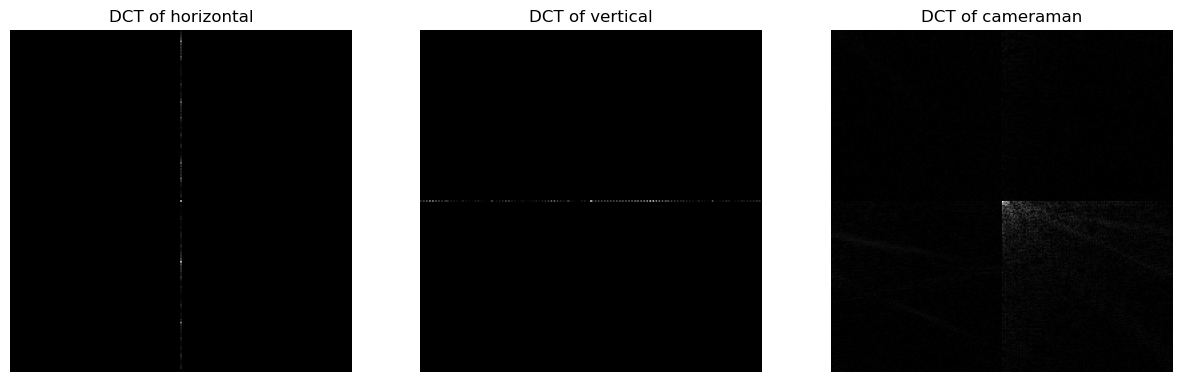

In [113]:
# Calculate Cosine Transforms
horizontal_dct = get_dct_matrix(horizontal_img)
horizontal_dct_shifted = np.fft.fftshift(horizontal_dct)
vertical_dct = get_dct_matrix(vertical_img)
vertical_dct_shifted = np.fft.fftshift(vertical_dct)
cameraman_dct = get_dct_matrix(cameraman_img)
cameraman_dct_shifted = np.fft.fftshift(cameraman_dct)

# Display magnitude spectrum
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
horizontal_mag_spectrum = np.log(1 + np.abs(horizontal_dct_shifted))
vertical_mag_spectrum = np.log(1 + np.abs(vertical_dct_shifted))
cameraman_mag_spectrum = np.log(1 + np.abs(cameraman_dct_shifted))
axes[0].imshow(horizontal_mag_spectrum, cmap='gray')
axes[0].set_title("DCT of horizontal")
axes[0].axis('off')
axes[1].imshow(vertical_mag_spectrum, cmap='gray')
axes[1].set_title("DCT of vertical")
axes[1].axis('off')
axes[2].imshow(cameraman_mag_spectrum, cmap='gray')
axes[2].set_title("DCT of cameraman")
axes[2].axis('off')

* Horizontal Lines: The image only has vertical frequencies. The DCT concentrates all the energy into one row of the transform.
* Vertical Lines: The image only has horizontal frequencies. The DCT concentrates all its energy into one column.
* Cameraman: The DCT shows exceptional energy compaction. Almost all the image's energy is packed at one place (the low-frequency coefficients).


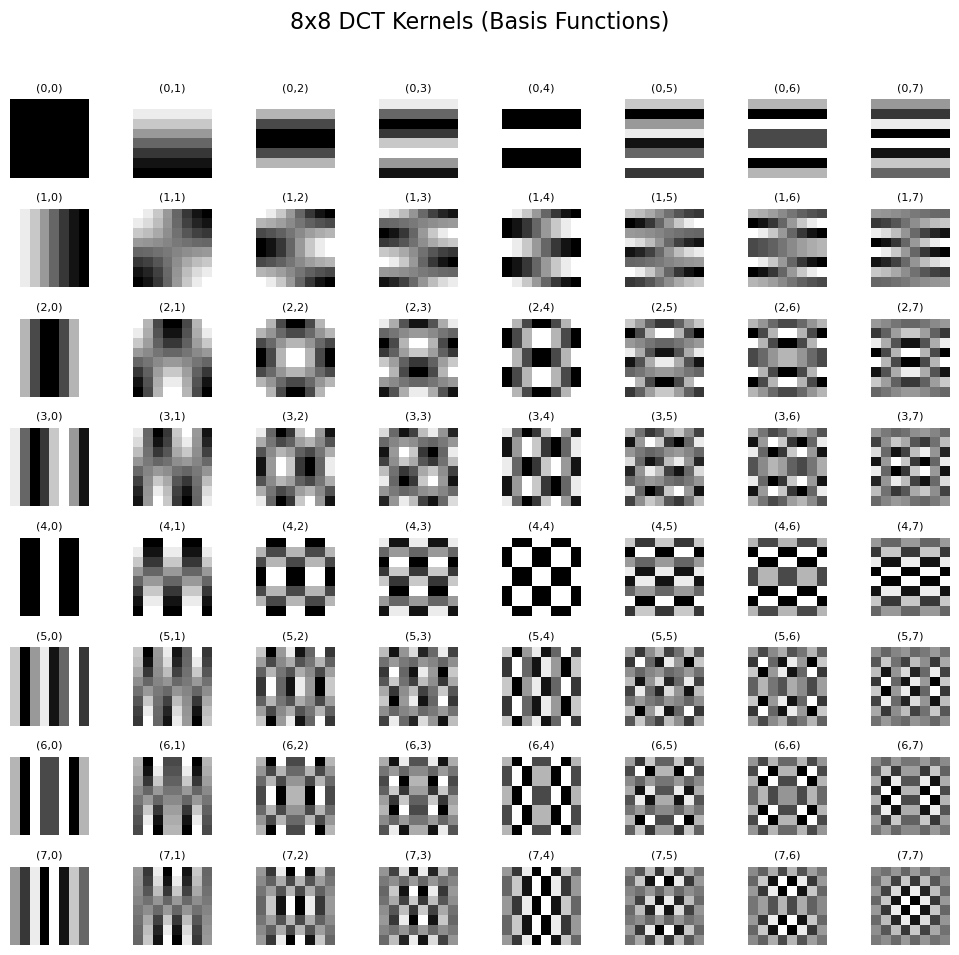

In [124]:
def plot_dct_kernels(N=8):
    fig, axes = plt.subplots(N, N, figsize=(10, 10))
    plt.suptitle(f"{N}x{N} DCT Kernels (Basis Functions)", fontsize=16)

    x, y = np.meshgrid(np.arange(N), np.arange(N))

    for u in range(N):
        for v in range(N):
            basis = np.cos(np.pi * u * (2*x + 1) / (2*N)) * np.cos(np.pi * v * (2*y + 1) / (2*N)) # 2D DCT basis
            
            ax = axes[u, v]
            ax.imshow(basis, cmap='gray')
            ax.set_title(f"({u},{v})", fontsize=8)
            ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()

plot_dct_kernels()

**3. Haar Transform**  
Show the different stages of the Haar transform of the given image with different basis:  
A =  
[255 255 255 255 255 255 255 255  
255 255 255 100 100 100 255 255  
255 255 100 150 150 150 100 255  
255 255 100 150 200 150 100 255  
255 255 100 150 150 150 100 255  
255 255 255 100 100 100 255 255  
255 255 255 255 050 255 255 255  
050 050 050 050 255 255 255 255]

In [131]:
# Image matrix
A = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 100, 100, 100, 255, 255],
    [255, 255, 100, 150, 150, 150, 100, 255],
    [255, 255, 100, 150, 200, 150, 100, 255],
    [255, 255, 100, 150, 150, 150, 100, 255],
    [255, 255, 255, 100, 100, 100, 255, 255],
    [255, 255, 255, 255,  50, 255, 255, 255],
    [ 50,  50,  50,  50, 255, 255, 255, 255]
])

# 1D Haar transform for one level - applies Haar transform along one axis (averaging and differencing)
def haar_1d(vector):
    n = len(vector)
    result = np.zeros_like(vector)
    for i in range(0, n, 2):
        avg = (vector[i] + vector[i+1]) / 2
        diff = (vector[i] - vector[i+1]) / 2
        result[i//2] = avg
        result[n//2 + i//2] = diff
    return result

# 2D Haar transform for one level - applies haar_1d() to rows, then columns
def haar_2d(matrix):
    n, m = matrix.shape
    temp = np.zeros_like(matrix)
    
    # Row transform
    for i in range(n):
        temp[i, :] = haar_1d(matrix[i, :])
        
    # Column transform
    result = np.zeros_like(temp)
    for j in range(m):
        result[:, j] = haar_1d(temp[:, j])
    
    return result

# Multilevel (hierarchical) Haar transform - repeatedly applies the transform to the top-left (low-frequency) region for multiple levels
def multilevel_haar_2d(matrix, levels):
    result = matrix.copy()
    stages = [matrix.copy()] # stores the matrix after each stage of transformation
    n = matrix.shape[0]
    for level in range(levels):
        size = n // (2**level)
        result[:size, :size] = haar_2d(result[:size, :size])
        stages.append(result.copy())
    return stages

# All stages
stages = multilevel_haar_2d(A, levels=3)

plt.figure(figsize=(10, 10))
for i, stage in enumerate(stages):
    plt.subplot(2, 2, i+1)
    plt.imshow(stage, cmap='gray')
    plt.title(f'Stage {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

The plots show how the transform progressively isolates information. At each stage, the top-left quadrant becomes a smaller, averaged version of the previous stage, while the other three quadrants store the high-frequency detail coefficients (horizontal, vertical and diagonal) for that scale.

**4. Walsh/Hadamard Transform**  
Show the different stages of the Walsh/Hadamard transform of the given image with
different basis:  
A =  
[255 255 255 255 255 255 255 255  
255 255 255 100 100 100 255 255  
255 255 100 150 150 150 100 255  
255 255 100 150 200 150 100 255  
255 255 100 150 150 150 100 255  
255 255 255 100 100 100 255 255  
255 255 255 255 050 255 255 255  
050 050 050 050 255 255 255 255]

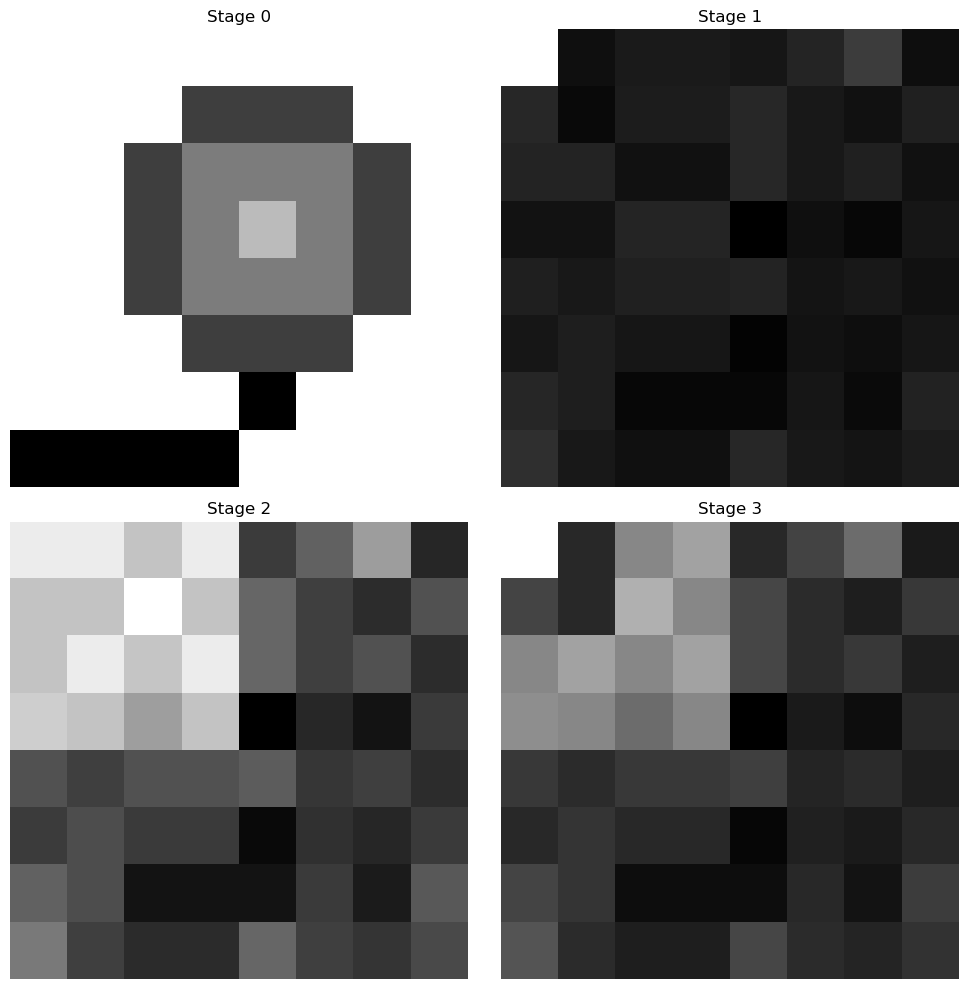

In [136]:
# Image matrix
A = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 100, 100, 100, 255, 255],
    [255, 255, 100, 150, 150, 150, 100, 255],
    [255, 255, 100, 150, 200, 150, 100, 255],
    [255, 255, 100, 150, 150, 150, 100, 255],
    [255, 255, 255, 100, 100, 100, 255, 255],
    [255, 255, 255, 255,  50, 255, 255, 255],
    [ 50,  50,  50,  50, 255, 255, 255, 255]
])

# Generate Hadamard matrix recursively
def hadamard_matrix(n):
    if n == 1:
        return np.array([[1]])
    H = hadamard_matrix(n // 2)
    top = np.hstack((H, H))
    bottom = np.hstack((H, -H))
    return np.vstack((top, bottom))

# Walsh-Hadamard Transform (2D)
def walsh_hadamard_2d(matrix):
    n = matrix.shape[0]
    H = hadamard_matrix(n)
    # Normalize for orthogonality
    H = H / np.sqrt(n)
    return H @ matrix @ H.T

# Multilevel (hierarchical) WHT
def multilevel_wht(matrix, levels=3):
    result = matrix.copy()
    stages = [matrix.copy()]
    n = matrix.shape[0]
    for level in range(levels):
        size = n // (2**level)
        result[:size, :size] = walsh_hadamard_2d(result[:size, :size])
        stages.append(result.copy())
    return stages

# All stages
stages = multilevel_wht(A, levels=3)

plt.figure(figsize=(10, 10))
for i, stage in enumerate(stages):
    plt.subplot(2, 2, i+1)
    plt.imshow(stage, cmap='gray')
    plt.title(f'Stage {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Unlike the Haar transform, the Walsh-Hadamard transform is not multi-resolution. It is a "full-frame" transform like the DFT. The final transform shows the image's energy distributed across the basis functions, which are square waves ("sequency" instead of frequency).

**5. Singular Value Decomposition**  
Show the different stages of SVD of the following image:  
A =  
[255 255 255 255 255 255 255 255  
255 255 255 100 100 100 255 255  
255 255 100 150 150 150 100 255  
255 255 100 150 200 150 100 255  
255 255 100 150 150 150 100 255  
255 255 255 100 100 100 255 255  
255 255 255 255 050 255 255 255  
050 050 050 050 255 255 255 255]

<Figure size 640x480 with 0 Axes>

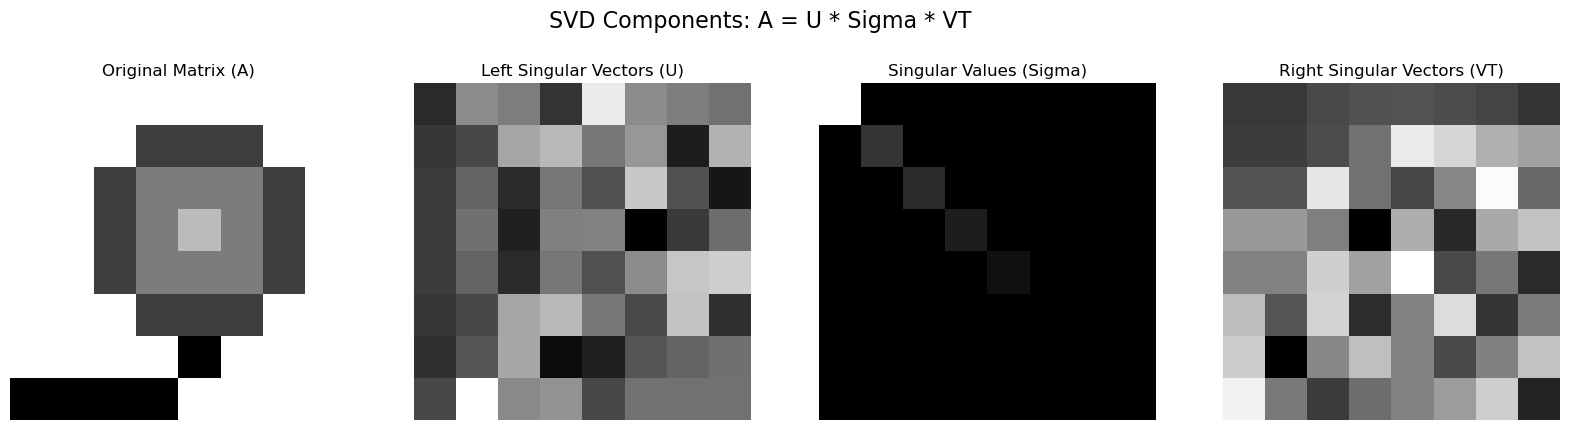

In [165]:
A = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 100, 100, 100, 255, 255],
    [255, 255, 100, 150, 150, 150, 100, 255],
    [255, 255, 100, 150, 200, 150, 100, 255],
    [255, 255, 100, 150, 150, 150, 100, 255],
    [255, 255, 255, 100, 100, 100, 255, 255],
    [255, 255, 255, 255,  50, 255, 255, 255],
    [ 50,  50,  50,  50, 255, 255, 255, 255]
])

# Helper function
def plot_image(img, title, is_gray=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    cmap = 'gray' if is_gray else None
    ax.imshow(img, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    return ax

def plot_svd_components(matrix):    
    # Perform SVD
    U, s, VT = np.linalg.svd(matrix)
    
    # Create the diagonal matrix Sigma from the singular values s
    Sigma = np.diag(s)
    
    # Plot
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    plt.suptitle("SVD Components: A = U * Sigma * VT", fontsize=16)
    
    plot_image(matrix, "Original Matrix (A)", ax=axes[0])
    plot_image(U, "Left Singular Vectors (U)", ax=axes[1])
    plot_image(Sigma, "Singular Values (Sigma)", ax=axes[2])
    plot_image(VT, "Right Singular Vectors (VT)", ax=axes[3])
    
    plt.show()

plt.tight_layout()
plt.show()
    
plot_svd_components(A)

* U and VT (V-transpose) are orthogonal matrices representing the "data" in different bases.  
* Sigma is a diagonal matrix containing the singular values. These values are sorted by importance and tell you how much "energy" or "information" is contained in each corresponding pair of singular vectors. The first few values are large and they drop off quickly.

**6. Approximating using SVD**  
(a) Use the cameraman image and find its singular values  
(b) Choose some value k < n, where n is the rank of P, the singular matrix  
(c) Keep the first k singular values and the rest zeroes to get Sigmaˆ  
(d) Reconstruct the image using these singular values  
(e) Calculate the error  
(f) Plot the error as a function of k  
(g) Add some random noise to your input image and do similar approximation. Infer
your results

We can reconstruct an image using only the top k singular values.

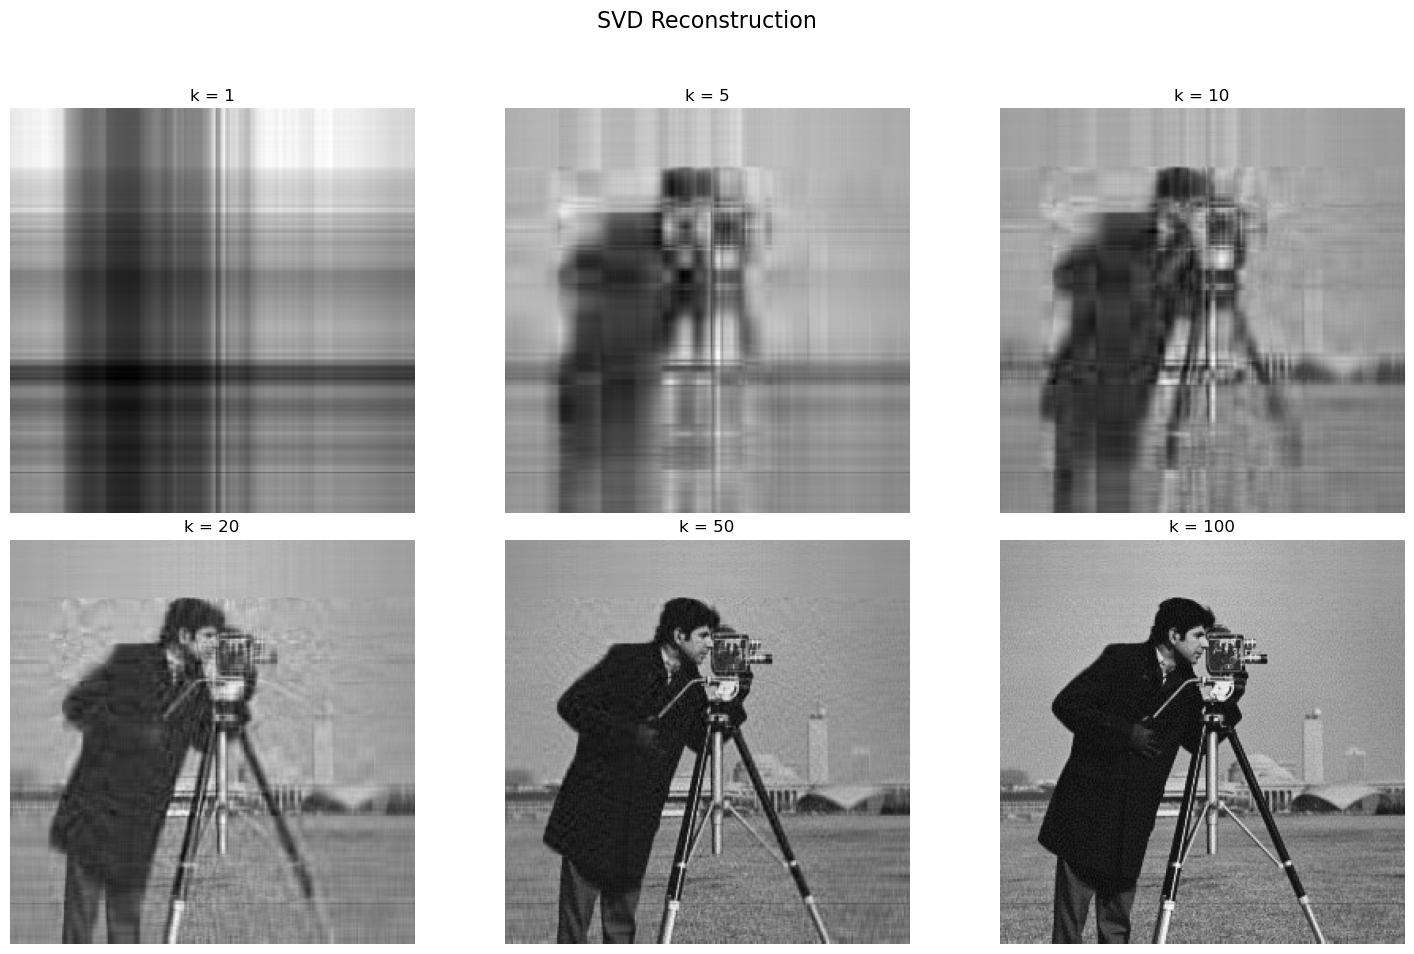

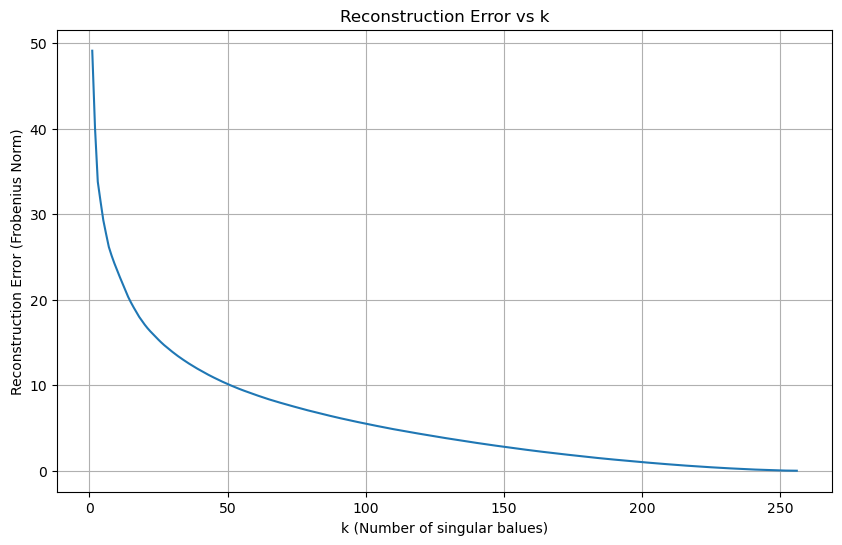

In [ ]:
def plot_svd_reconstruction(img):
    # Convert to grayscale using luminosity method
    if img.ndim == 3:
        img = 0.2989 * img[..., 0] + 0.5870 * img[..., 1] + 0.1140 * img[..., 2]
    
    # Decompose the image
    U, s, VT = np.linalg.svd(img, full_matrices=False)
    
    errors = []
    k_values = [1, 5, 10, 20, 50, 100] # k values to plot
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    plt.suptitle(f"SVD Reconstruction", fontsize=16)
    axes_flat = axes.flatten()
    plot_idx = 0
    
    max_k = len(s)
    
    for k in range(1, max_k + 1):
        # Keep first k singular values
        current_s = s[:k]
        current_U = U[:, :k]
        current_VT = VT[:k, :]
        
        # Reconstruct the image
        reconstructed_img = current_U @ np.diag(current_s) @ current_VT
        
        # Calculate error
        error = np.linalg.norm(img - reconstructed_img)
        errors.append(error)
        
        # Plot reconstruction for specific k values
        if k in k_values:
            plot_image(reconstructed_img, f"k = {k}", ax=axes_flat[plot_idx])
            plot_idx += 1
            
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    # Plot error as a function of k
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), errors)
    plt.title(f"Reconstruction Error vs k")
    plt.xlabel("k (Number of singular balues)")
    plt.ylabel("Reconstruction Error (Frobenius Norm)")
    plt.grid(True)
    plt.show()
    
    return U, s, VT

# Run on original cameraman image
U_orig, s_orig, VT_orig = plot_svd_reconstruction(cameraman_img)

SVD on Noisy Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.8639664026697993].


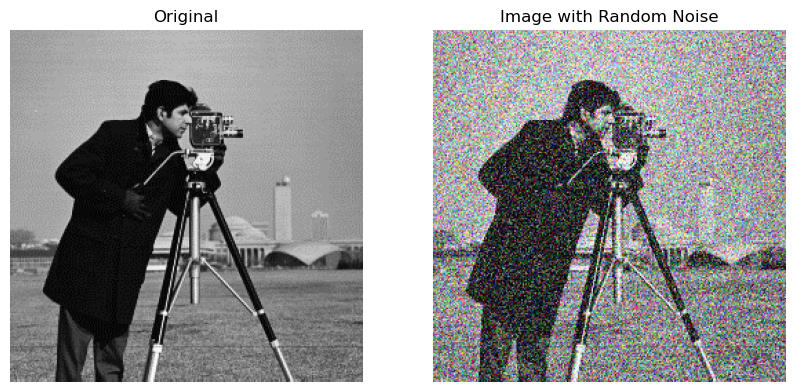

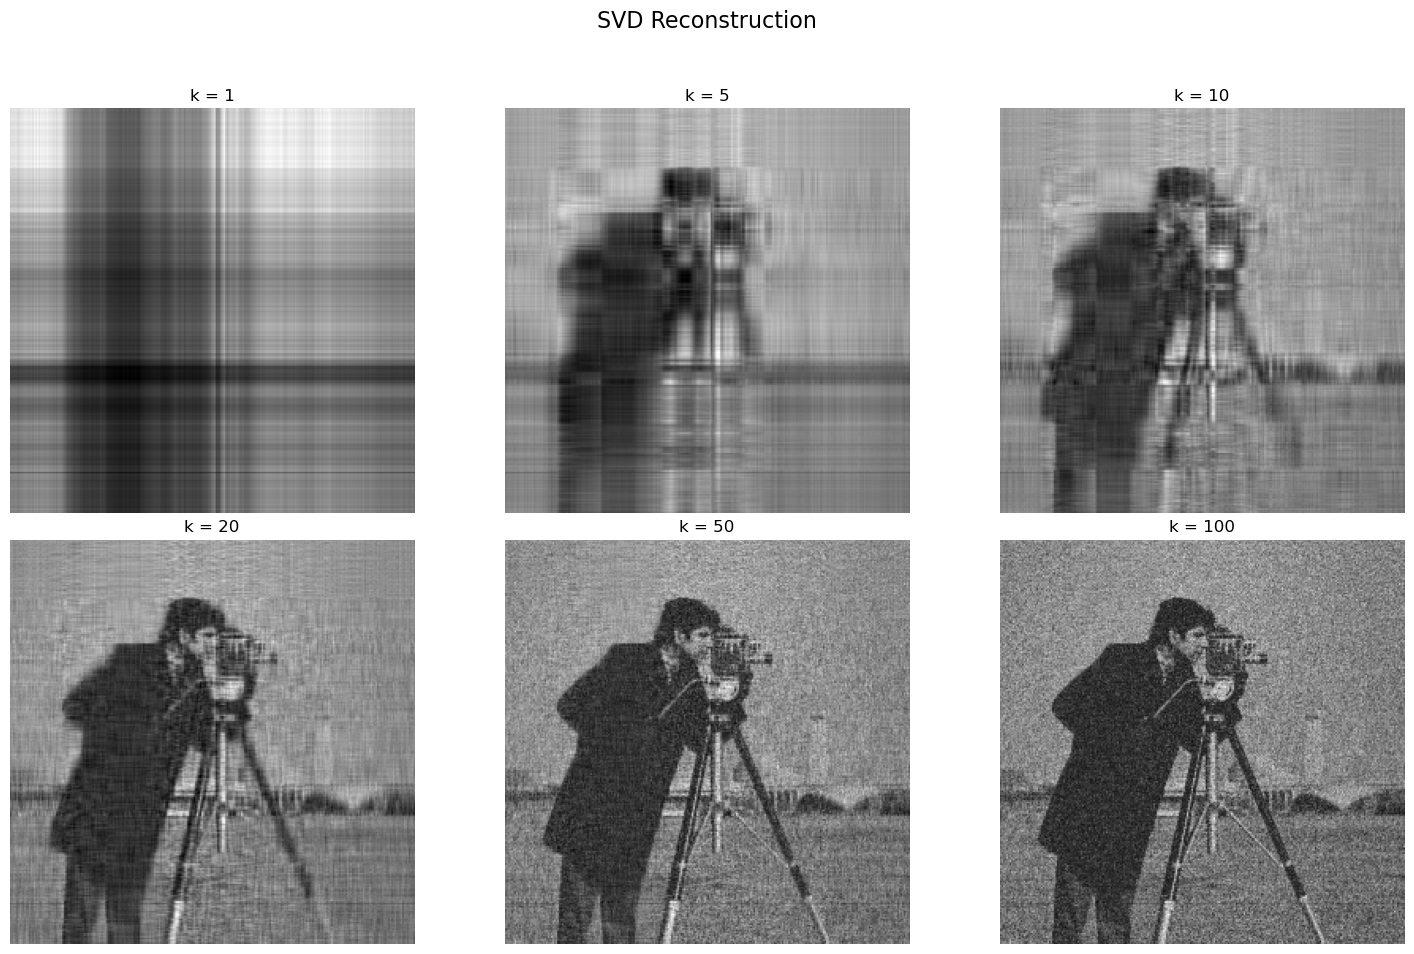

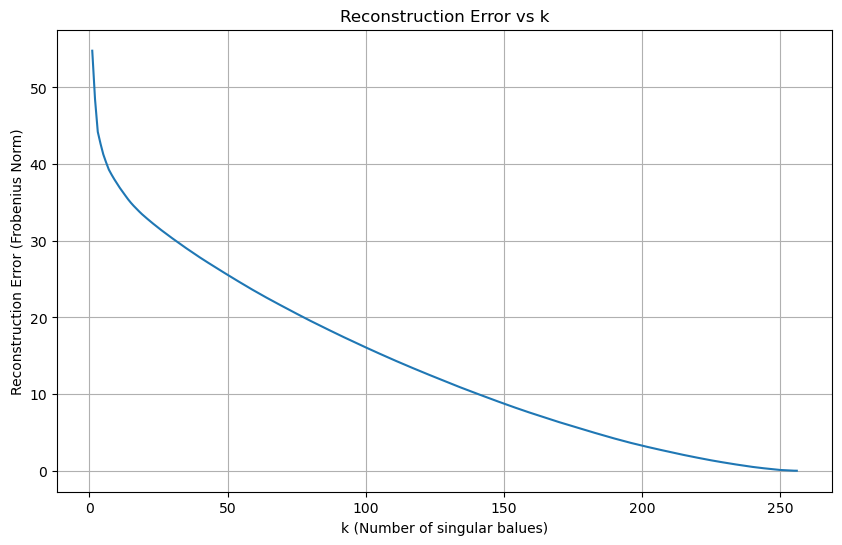

In [152]:
# Add random noise
noise = np.random.normal(0, 0.2, cameraman_img.shape) # mean=0, std=0.2
noisy_img = cameraman_img + noise
noisy_img = np.clip(noisy_img, 0, 255) # clip values to be valid pixels

# Plot noisy image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_image(cameraman_img, "Original", ax=axes[0])
plot_image(noisy_img, "Image with Random Noise", ax=axes[1])
plt.show()

# Run SVD reconstruction on noisy image
U_noisy, s_noisy, Vh_noisy = plot_svd_reconstruction(noisy_img)

Inferences:  
* Error Plot: The error plot drops very quickly, showing that just a few singular values capture most of the image's structure.  
* Reconstructions: The image quality improve dramatically as k increases.  
* Noisy Image: The k vs error plot for the noisy image have a flatter tail. The initial singular values (low k) represent the image's main structure, while the many small singular values that follow (high k) largely represent the noise.
* Thus, SVD can be used for denoising. A low-k reconstruction of the noisy image (e.g., k=50) often looks cleaner than the original noisy image because it discards the high-k components which were mostly noise.

**7. Filtering**  
Perform high pass and low pass filtering in a noisy image and comment on your observations. Display the noise, noisy image, filter used, multiplied fft and inverse fft.  
(Use cameraman.png image)

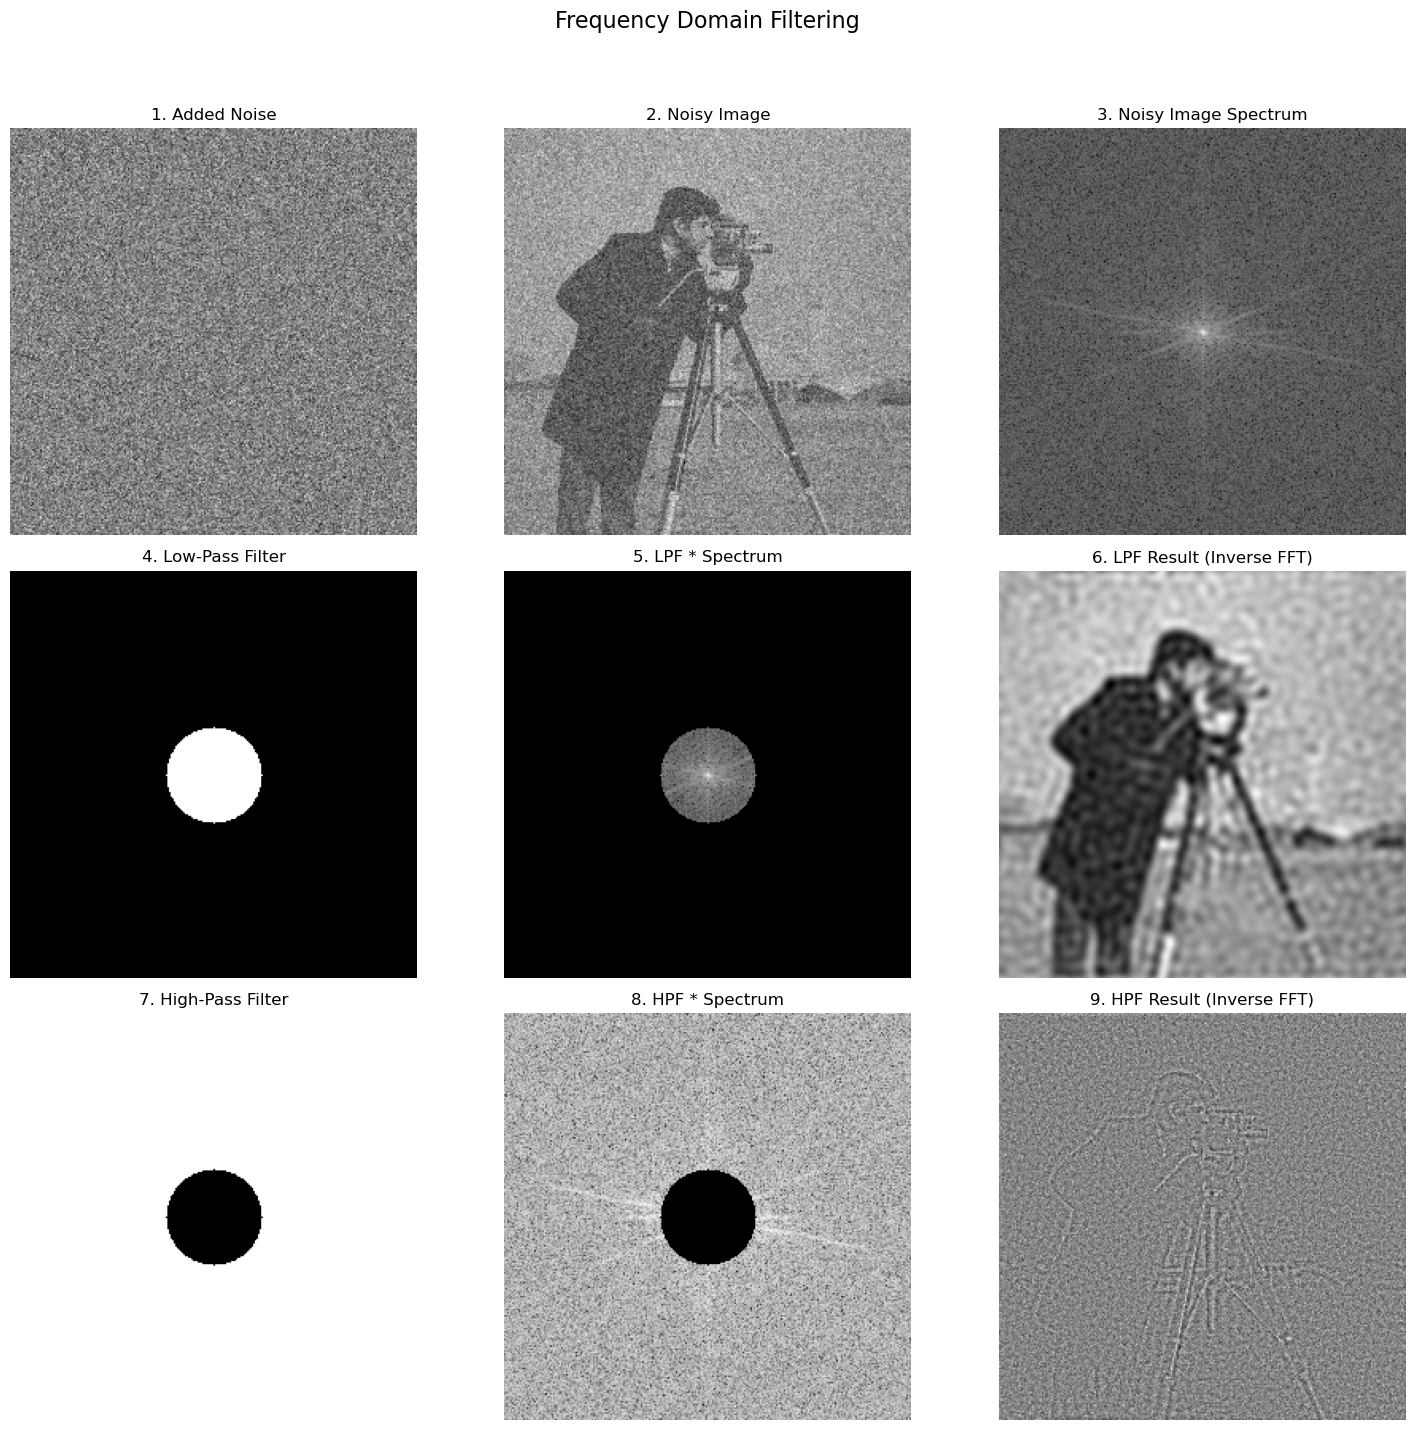

In [ ]:
# Helper functions
def plot_image(img, title, is_gray=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    cmap = 'gray' if is_gray else None
    ax.imshow(img, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    return ax
def plot_spectrum(F_shifted, title, ax=None):
    magnitude_spectrum = np.log(1 + np.abs(F_shifted))
    plot_image(magnitude_spectrum, title, is_gray=True, ax=ax)
    
# Function to perform high-pass and low-pass filtering of a noisy image
def frequency_domain_filtering(img):
    # Convert to grayscale using luminosity method
    if img.ndim == 3:
        img = 0.2989 * img[..., 0] + 0.5870 * img[..., 1] + 0.1140 * img[..., 2]
    
    # Add noise
    noise = np.random.normal(0, 0.2, img.shape)
    noisy_img = img + noise
    
    # Get FFT of noisy image
    F_noisy = np.fft.fft2(noisy_img)
    F_noisy_shifted = np.fft.fftshift(F_noisy)
    
    # Create filters
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    
    # Create a distance grid
    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    xx, yy = np.meshgrid(x, y)
    distance = np.sqrt(xx**2 + yy**2)
    
    # LPF
    radius_lpf = 30
    lpf = (distance <= radius_lpf).astype(float)
    
    # HPF
    radius_hpf = 30
    hpf = (distance > radius_hpf).astype(float)
    
    # Apply filters and Inverse FFT
    
    # Low-Pass
    F_lpf_shifted = F_noisy_shifted * lpf
    F_lpf = np.fft.ifftshift(F_lpf_shifted)
    img_lpf = np.fft.ifft2(F_lpf)
    img_lpf = np.real(img_lpf)
    
    # High-Pass
    F_hpf_shifted = F_noisy_shifted * hpf
    F_hpf = np.fft.ifftshift(F_hpf_shifted)
    img_hpf = np.fft.ifft2(F_hpf)
    img_hpf = np.real(img_hpf)
    
    # Plot
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    plt.suptitle("Frequency Domain Filtering", fontsize=16)
    
    plot_image(noise, "1. Added Noise", ax=axes[0, 0])
    plot_image(noisy_img, "2. Noisy Image", ax=axes[0, 1])
    plot_spectrum(F_noisy_shifted, "3. Noisy Image Spectrum", ax=axes[0, 2])
    
    plot_image(lpf, "4. Low-Pass Filter", ax=axes[1, 0])
    plot_spectrum(F_lpf_shifted, "5. LPF * Spectrum", ax=axes[1, 1])
    plot_image(img_lpf, "6. LPF Result (Inverse FFT)", ax=axes[1, 2])
    
    plot_image(hpf, "7. High-Pass Filter", ax=axes[2, 0])
    plot_spectrum(F_hpf_shifted, "8. HPF * Spectrum", ax=axes[2, 1])
    plot_image(img_hpf, "9. HPF Result (Inverse FFT)", ax=axes[2, 2])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

frequency_domain_filtering(cameraman_img)

Observations:  
* Low-Pass Filter (LPF): By keeping only the low frequencies (the center of the spectrum), the LPF successfully removes the high-frequency noise. The trade-off is that it also removes the image's own high-frequency details (like sharp edges), resulting in a blurred or smoothened image.  
* High-Pass Filter (HPF): By removing the low frequencies, the HPF eliminates the main structure of the image (the flat, non-changing areas). It keeps only the high-frequency components which are the edges of the objects and the noise. The resulting image shows a faint outline of the cameraman and a lot of the noise that we added.